<a href="https://colab.research.google.com/github/FKoeppe/sdsphd20_portfolio_fk/blob/main/Frederik_Koeppe_Homework_Thursday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

In [ ]:
# Load the data

stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [ ]:
# Your solutions from here...

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [ ]:
data

,0,1
0,I was thrilled to be back in the Great city of...,True
1,The Unsolicited Mail In Ballot Scam is a major...,True
2,"As long as I am President, I will always stand...",True
3,"Our Economy is doing great, and is ready to se...",True
4,If I do not sound like a typical Washington po...,True
...,...,...
14731,But there is not one!....I am a very strong be...,False
14732,We are only wasting money because of the Fake ...,False
14733,"The Washington Post, after having been so dish...",False
14734,No one else did so well in many decades of bei...,False


In [ ]:
!pip -q install eli5 #installing a great package for explaining ML models

     |████████████████████████████████| 112kB 5.8MB/s 


In [ ]:
import numpy as np

In [ ]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

BoW method:

In [ ]:
# define in and outputs

X = data[0].values
y = data[1].values

In [ ]:
# Split the data in 93% trainig 7% test to get around 1000 test tweets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07, random_state=18)

In [ ]:
# Simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [ ]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.812015503875969

In [ ]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)

In [ ]:
# confusion matrix by hand...

pd.crosstab(y_test, y_pred)

col_0,False,True
row_0,,
False,415,108
True,86,423


Performance ist little bit over 80%

TFIDF Method:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.8294573643410853

TFIDF performs only slightly better -> 83%

In [ ]:
import eli5
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['False','True'], top=50)

I have found it strange that words like Foxnews and makeamericagreatagain are in the False Camp, buts its true. I looked through the data and especially foxnews is almost entirely in the False tweets. It did not expect that.

In [ ]:
X_test[900]

"The Fake News doesn't want to discuss or cover this.” @JudicialWatch @foxandfriendsTHANK YOU-Virginia! #MAGA🇺🇸 forward to being with @SenMikeCrapo of Indiana as the first African American Senator in Congress! Together, we are going to"

In [ ]:
eli5.show_prediction(model, X_test[900], vec=vectorizer, target_names=['False','True'])

In [ ]:
preds_array = model.predict_proba(X_test_vec_2)

In [ ]:
preds_array[:,1]

array([0.69152888, 0.76249411, 0.11219862, ..., 0.04892583, 0.36444668,
       0.55005409])

In [ ]:
predsDF = pd.DataFrame({'text':X_test, 'pred_pos':preds_array[:,1], 'y_test':y_test})

In [ ]:
predsDF['diff_error'] =  predsDF.pred_pos - predsDF.y_test

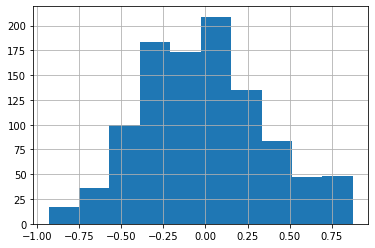

In [ ]:
predsDF.diff_error.hist()

In [ ]:
predsDF.sort_values('diff_error', ascending=True).iloc[0,0]

'We must have Security at our VERY DANGEROUS SOUTHERN BORDER, and we must have a great WALL to help protect us, and to help stop the massive inflow of drugs pouring into our country!'

Spacy English Language Model:

In [ ]:
# Let's fire up spacy

import spacy

# and load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

# find more models for other languages here: https://spacy.io/models/

In [ ]:
X_test[1]

'Texas LC George P. Bush backed me when it wasn’t the politically correct thing to do, and I back him now.'

In [ ]:
doc = nlp(X_test[1])

In [ ]:
# let's look at the POS tags
[(tok.text, tok.pos_) for tok in doc]

[('Texas', 'PROPN'),
 ('LC', 'PROPN'),
 ('George', 'PROPN'),
 ('P.', 'PROPN'),
 ('Bush', 'PROPN'),
 ('backed', 'VERB'),
 ('me', 'PRON'),
 ('when', 'ADV'),
 ('it', 'PRON'),
 ('was', 'AUX'),
 ('n’t', 'PART'),
 ('the', 'DET'),
 ('politically', 'ADV'),
 ('correct', 'ADJ'),
 ('thing', 'NOUN'),
 ('to', 'PART'),
 ('do', 'AUX'),
 (',', 'PUNCT'),
 ('and', 'CCONJ'),
 ('I', 'PRON'),
 ('back', 'VERB'),
 ('him', 'PRON'),
 ('now', 'ADV'),
 ('.', 'PUNCT')]

In [ ]:
# Let's tokenize the first 1032 tweets 
tokenlist = []
for doc in nlp.pipe(X_train[:1032]):
  tokens =[tok.text.lower() for tok in doc if tok.pos_ in ['NOUN','ADJ','ADV','VERB'] and not tok.is_stop]
  tokenlist.append(tokens)

In [ ]:
from gensim.corpora.dictionary import Dictionary

In [ ]:
dictionary = Dictionary(tokenlist)

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [ ]:
vectorizer = TfidfVectorizer(vocabulary=list(dictionary.values()))
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test_vec_2 = vectorizer.fit_transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.7315891472868217

Using the Spacy Language Model results in a lower score. Also exclude extreme words further reduces the result (down to 71%). Maybe this has something to do with "unnormal" language Trump is using.

In [ ]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['False','True'], top=50)

In [ ]:
eli5.show_prediction(model, X_test[900], vec=vectorizer, target_names=['False','True'])

SVD:

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier

tfidf = TfidfVectorizer(vocabulary=list(dictionary.values()))
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
clf = MLPClassifier(verbose=False)


pipe = make_pipeline(tfidf, svd, clf)

pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rat

In [ ]:
pipe.score(X_test, y_test)

0.7674418604651163

In [ ]:
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(X_test[0], pipe.predict_proba)
te.show_prediction(target_names=['False','True'])

SVD performance is at 76%, therefore it seems that the "easiest" model performs best on this task.